In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/hapresent/Desktop/데이터톤/archive/customer.csv')

In [3]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date'],
      dtype='object')

In [4]:
selected_cols = df[['customer_id', 'gender', 'birthdate', 'first_join_date']]

In [5]:
selected_cols

,customer_id,gender,birthdate,first_join_date
0,2870,F,1996-06-14,2019-07-21
1,8193,F,1993-08-16,2017-07-16
2,7279,M,1989-01-23,2020-08-23
3,88813,M,1991-01-05,2021-10-03
4,82542,M,2000-07-15,2021-04-11
...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17
99996,72065,M,1998-03-30,2017-11-25
99997,32818,F,1993-01-12,2018-09-01
99998,75597,M,2000-09-13,2020-05-31


In [6]:
selected_cols

,customer_id,gender,birthdate,first_join_date
0,2870,F,1996-06-14,2019-07-21
1,8193,F,1993-08-16,2017-07-16
2,7279,M,1989-01-23,2020-08-23
3,88813,M,1991-01-05,2021-10-03
4,82542,M,2000-07-15,2021-04-11
...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17
99996,72065,M,1998-03-30,2017-11-25
99997,32818,F,1993-01-12,2018-09-01
99998,75597,M,2000-09-13,2020-05-31


In [7]:
df_customer = selected_cols

In [8]:
df_customer

,customer_id,gender,birthdate,first_join_date
0,2870,F,1996-06-14,2019-07-21
1,8193,F,1993-08-16,2017-07-16
2,7279,M,1989-01-23,2020-08-23
3,88813,M,1991-01-05,2021-10-03
4,82542,M,2000-07-15,2021-04-11
...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17
99996,72065,M,1998-03-30,2017-11-25
99997,32818,F,1993-01-12,2018-09-01
99998,75597,M,2000-09-13,2020-05-31


## 우선적으로 거래 성공 고객 살펴보기

In [10]:
df = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0806/transaction_customer_pricelabel.csv')

In [11]:
df

,customer_id,dominant_price_label,count
0,43202,middle price,405
1,29496,middle price,382
2,82237,middle price,346
3,10167,middle price,340
4,69740,middle price,327
...,...,...,...
50236,24769,middle price,1
50237,82253,middle price,1
50238,24774,middle price,1
50239,82251,high price,1


In [12]:
# customer_id가 51844인 행 제거
df_filtered = df[df['customer_id'] != 51844]

In [13]:
df_filtered.to_csv('/Users/hapresent/Desktop/데이터톤/0806/transaction_customer_pricelabel.csv', index=False)

In [14]:
df_transaction = df_filtered

In [15]:
df_transaction.head(3)

,customer_id,dominant_price_label,count
0,43202,middle price,405
1,29496,middle price,382
2,82237,middle price,346


In [16]:
df_customer.head(3)

,customer_id,gender,birthdate,first_join_date
0,2870,F,1996-06-14,2019-07-21
1,8193,F,1993-08-16,2017-07-16
2,7279,M,1989-01-23,2020-08-23


In [17]:
df_merged = pd.merge(df_transaction, df_customer, on= 'customer_id', how='left')

In [18]:
df_merged #거래 성공 고객에 한해 계산 

,customer_id,dominant_price_label,count,gender,birthdate,first_join_date
0,43202,middle price,405,F,1999-11-16,2016-07-24
1,29496,middle price,382,F,2008-05-07,2016-12-03
2,82237,middle price,346,F,1996-11-06,2017-01-28
3,10167,middle price,340,F,1992-11-16,2017-05-28
4,69740,middle price,327,F,2001-03-09,2017-02-13
...,...,...,...,...,...,...
50236,24769,middle price,1,F,2000-08-19,2021-08-31
50237,82253,middle price,1,M,1994-05-16,2019-09-15
50238,24774,middle price,1,F,1992-10-07,2019-07-27
50239,82251,high price,1,F,1991-11-28,2018-09-29


In [19]:
import pandas as pd

today = pd.to_datetime("2025-08-06")

In [20]:
# birthdate가 datetime 형식이 아닐 경우 변환
df_merged['birthdate'] = pd.to_datetime(df_merged['birthdate'])

# age 재계산
df_merged['age'] = df_merged['birthdate'].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))
)


In [21]:
df_merged['age']

0        25
1        17
2        28
3        32
4        24
         ..
50236    24
50237    31
50238    32
50239    33
50240    15
Name: age, Length: 50241, dtype: int64

In [22]:
df_merged

,customer_id,dominant_price_label,count,gender,birthdate,first_join_date,age
0,43202,middle price,405,F,1999-11-16,2016-07-24,25
1,29496,middle price,382,F,2008-05-07,2016-12-03,17
2,82237,middle price,346,F,1996-11-06,2017-01-28,28
3,10167,middle price,340,F,1992-11-16,2017-05-28,32
4,69740,middle price,327,F,2001-03-09,2017-02-13,24
...,...,...,...,...,...,...,...
50236,24769,middle price,1,F,2000-08-19,2021-08-31,24
50237,82253,middle price,1,M,1994-05-16,2019-09-15,31
50238,24774,middle price,1,F,1992-10-07,2019-07-27,32
50239,82251,high price,1,F,1991-11-28,2018-09-29,33


In [23]:
df_merged['birthdate'].describe()

count                            50241
mean     1995-12-26 09:36:06.190959616
min                1954-06-30 00:00:00
25%                1991-07-04 00:00:00
50%                1996-08-04 00:00:00
75%                2001-03-15 00:00:00
max                2016-02-19 00:00:00
Name: birthdate, dtype: object

In [24]:
def get_age_group(age):
    if age < 20:
        return '20대 미만'  # 또는 '미분류', '0~9세', '기타' 등도 가능
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    else:
        return '50대 이상'


In [25]:
df_merged['age_group'] = df_merged['age'].apply(get_age_group)

In [26]:
df_merged

,customer_id,dominant_price_label,count,gender,birthdate,first_join_date,age,age_group
0,43202,middle price,405,F,1999-11-16,2016-07-24,25,20대
1,29496,middle price,382,F,2008-05-07,2016-12-03,17,20대 미만
2,82237,middle price,346,F,1996-11-06,2017-01-28,28,20대
3,10167,middle price,340,F,1992-11-16,2017-05-28,32,30대
4,69740,middle price,327,F,2001-03-09,2017-02-13,24,20대
...,...,...,...,...,...,...,...,...
50236,24769,middle price,1,F,2000-08-19,2021-08-31,24,20대
50237,82253,middle price,1,M,1994-05-16,2019-09-15,31,30대
50238,24774,middle price,1,F,1992-10-07,2019-07-27,32,30대
50239,82251,high price,1,F,1991-11-28,2018-09-29,33,30대


In [27]:
df_merged['age_group'].value_counts()

age_group
20대       23968
30대       18151
40대        3920
20대 미만     3784
50대 이상      418
Name: count, dtype: int64

In [28]:
df = df_merged

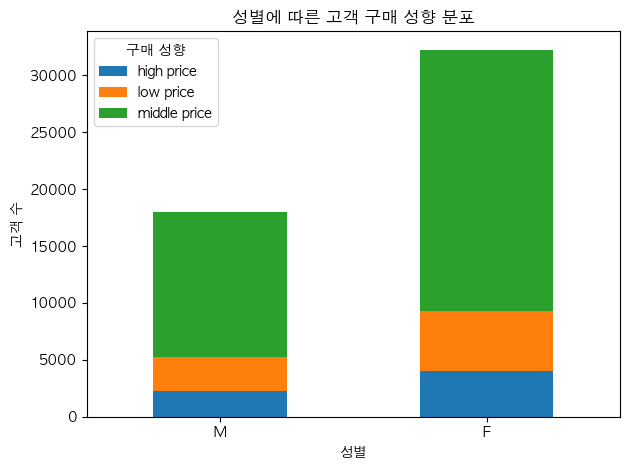

In [36]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
gender_price = pd.crosstab(df['gender'], df['dominant_price_label'])
gender_price = gender_price.reindex(['M', 'F'])  # 순서 정렬

gender_price.plot(kind='bar', stacked=True)
plt.title('성별에 따른 고객 구매 성향 분포')
plt.xlabel('성별')
plt.ylabel('고객 수')
plt.xticks(rotation=0)  # <- 여기!
plt.legend(title='구매 성향')
plt.tight_layout()
plt.show()


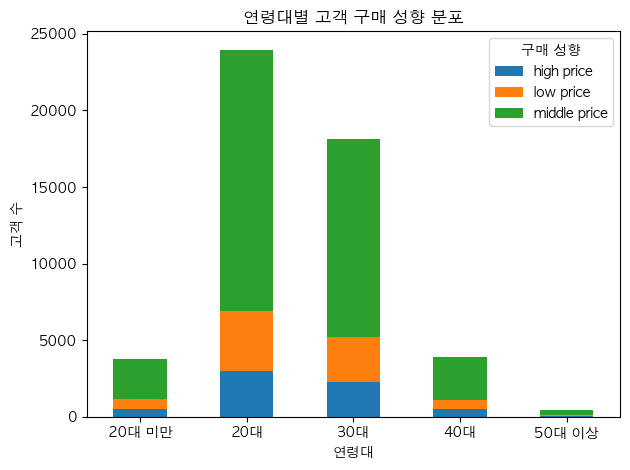

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 교차표 만들기: 연령대 x 가격 성향
age_price = pd.crosstab(df['age_group'], df['dominant_price_label'])

# 연령대 순서 지정 (보통 문자열 순서가 의도와 다르므로 명시)
age_order = ['20대 미만', '20대', '30대', '40대', '50대 이상']
age_price = age_price.reindex(age_order)

# 누적 막대그래프 그리기
age_price.plot(kind='bar', stacked=True)
plt.title('연령대별 고객 구매 성향 분포')
plt.xlabel('연령대')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.legend(title='구매 성향')
plt.tight_layout()
plt.show()


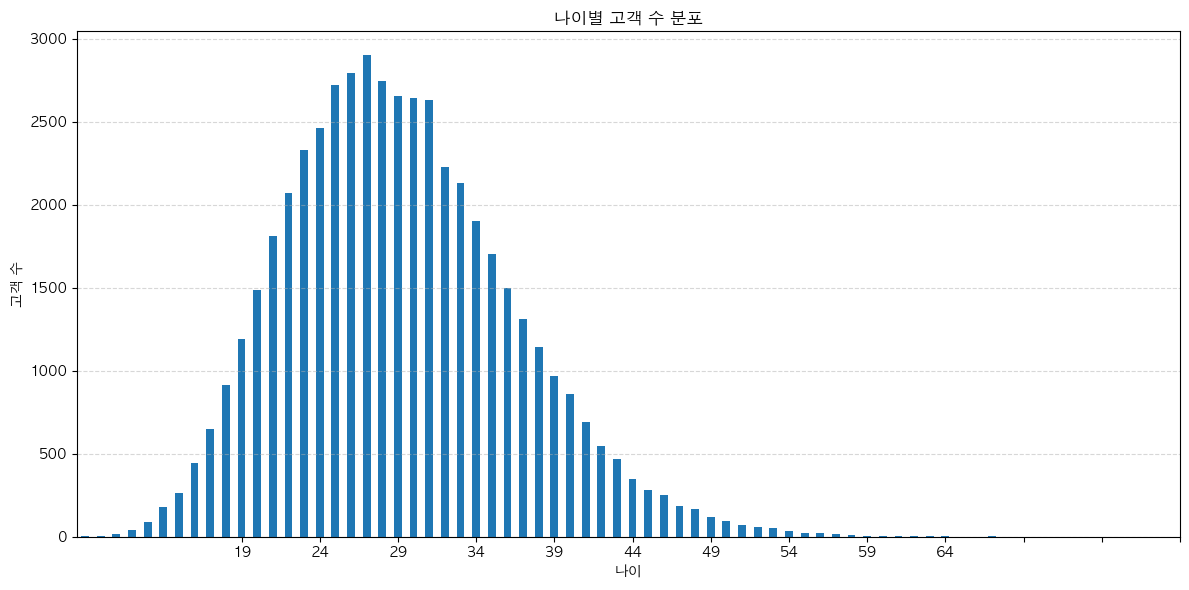

In [40]:
import numpy as np

# 나이별 고객 수 분포
age_counts = df['age'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar')

# X축 눈금 간격 조정
plt.xticks(ticks=np.arange(10, 75, 5), rotation=0)  # 10세부터 70세까지 5살 간격

plt.title('나이별 고객 수 분포')
plt.xlabel('나이')
plt.ylabel('고객 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# 나이 + 성별 교차표 만들기
age_gender = pd.crosstab(df['age'], df['gender']).sort_index()

# 남녀 컬럼이 없는 나이대도 있을 수 있으니 결측값 처리
age_gender = age_gender.fillna(0)


<Figure size 1400x600 with 0 Axes>

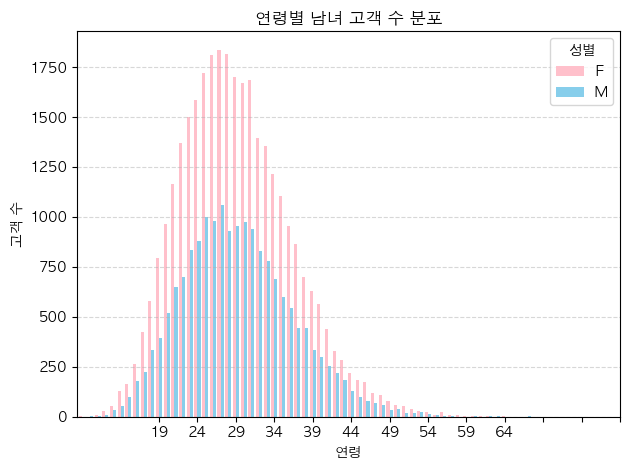

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 나이 + 성별 교차표 만들기
age_gender = pd.crosstab(df['age'], df['gender']).sort_index()
age_gender = age_gender[['F', 'M']]  # 보기 좋게 여성-남성 순서로 정렬

# 그래프
plt.figure(figsize=(14, 6))
age_gender.plot(kind='bar', stacked=False, color={'F': 'pink', 'M': 'skyblue'}, width=0.8)

plt.title('연령별 남녀 고객 수 분포')
plt.xlabel('연령')
plt.ylabel('고객 수')
plt.xticks(ticks=np.arange(10, 75, 5), rotation=0)
plt.legend(title='성별', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
df['gender'].value_counts()

gender
F    32252
M    17989
Name: count, dtype: int64

In [48]:
df['gender'].value_counts(normalize=True)

gender
F    0.641946
M    0.358054
Name: proportion, dtype: float64

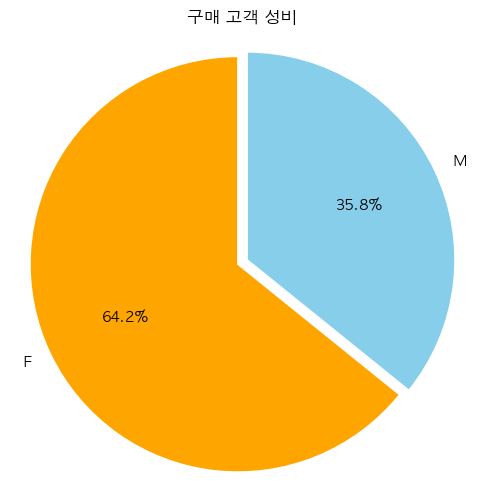

In [50]:
import matplotlib.pyplot as plt

# 성비 데이터
gender_ratio = df['gender'].value_counts(normalize=True)

# 파이차트
plt.figure(figsize=(6, 6))
plt.pie(gender_ratio,
        labels=gender_ratio.index,
        autopct='%.1f%%',
        colors=['orange', 'skyblue'],
        startangle=90,
        explode=[0.05, 0],  # 약간 강조
        wedgeprops=dict(edgecolor='white'))

plt.title('구매 고객 성비')
plt.axis('equal')  # 원형 유지
plt.show()


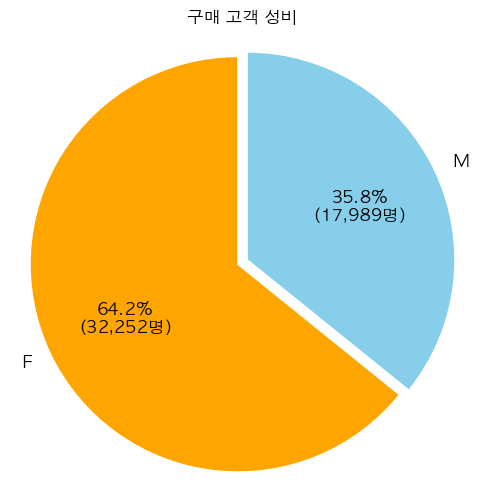

In [52]:
import matplotlib.pyplot as plt

# 값 준비
gender_count = df['gender'].value_counts()
gender_ratio = df['gender'].value_counts(normalize=True)

# 내부 텍스트 포맷 함수 정의
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count:,}명)"
    return my_autopct

# 파이차트
plt.figure(figsize=(6, 6))
plt.pie(gender_count,
        labels=gender_count.index,  # 바깥 라벨은 'F', 'M'
        autopct=make_autopct(gender_count),  # 안쪽 텍스트
        colors=['orange', 'skyblue'],
        startangle=90,
        explode=[0.05, 0],
        wedgeprops=dict(edgecolor='white'),
        textprops=dict(color="black", fontsize=12))

plt.title('구매 고객 성비')
plt.axis('equal')
plt.show()


In [58]:
import seaborn as sns

In [59]:
# 교차표: 성별 × 연령대 × 가격 성향
pivot = pd.crosstab(
    [df['gender'], df['age_group']],
    df['dominant_price_label'],
    normalize='index'  # 비율로 보기 위해
)


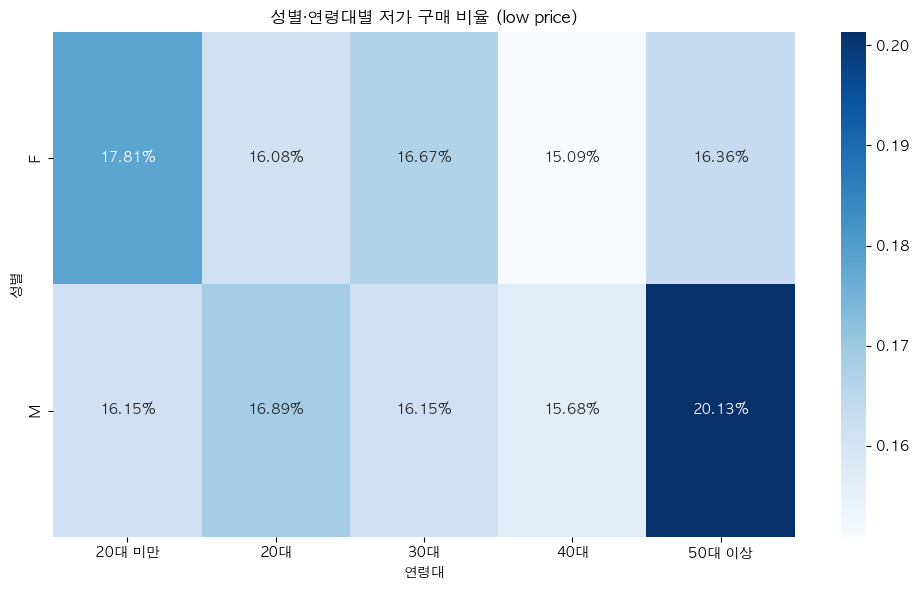

In [60]:
low_heat = pivot['low price'].unstack()[age_order]

plt.figure(figsize=(10, 6))
sns.heatmap(low_heat, annot=True, fmt='.2%', cmap='Blues')
plt.title('성별·연령대별 저가 구매 비율 (low price)')
plt.xlabel('연령대')
plt.ylabel('성별')
plt.tight_layout()
plt.show()


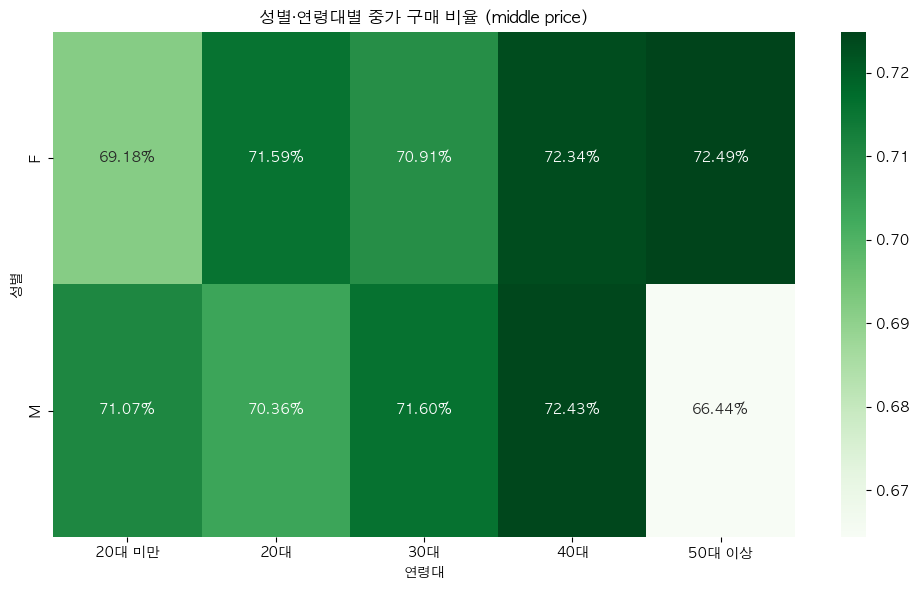

In [63]:
mid_heat = pivot['middle price'].unstack()[age_order]

plt.figure(figsize=(10, 6))
sns.heatmap(mid_heat, annot=True, fmt='.2%', cmap='Greens')
plt.title('성별·연령대별 중가 구매 비율 (middle price)')
plt.xlabel('연령대')
plt.ylabel('성별')
plt.tight_layout()
plt.show()


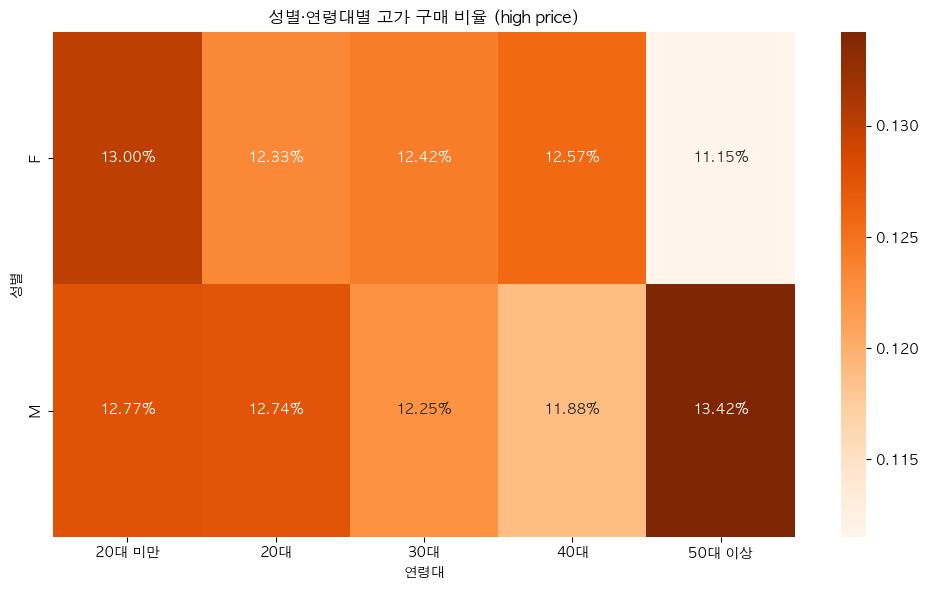

In [65]:
high_heat = pivot['high price'].unstack()[age_order]

plt.figure(figsize=(10, 6))
sns.heatmap(high_heat, annot=True, fmt='.2%', cmap='Oranges')
plt.title('성별·연령대별 고가 구매 비율 (high price)')
plt.xlabel('연령대')
plt.ylabel('성별')
plt.tight_layout()
plt.show()


In [68]:
df

,customer_id,dominant_price_label,count,gender,birthdate,first_join_date,age,age_group
0,43202,middle price,405,F,1999-11-16,2016-07-24,25,20대
1,29496,middle price,382,F,2008-05-07,2016-12-03,17,20대 미만
2,82237,middle price,346,F,1996-11-06,2017-01-28,28,20대
3,10167,middle price,340,F,1992-11-16,2017-05-28,32,30대
4,69740,middle price,327,F,2001-03-09,2017-02-13,24,20대
...,...,...,...,...,...,...,...,...
50236,24769,middle price,1,F,2000-08-19,2021-08-31,24,20대
50237,82253,middle price,1,M,1994-05-16,2019-09-15,31,30대
50238,24774,middle price,1,F,1992-10-07,2019-07-27,32,30대
50239,82251,high price,1,F,1991-11-28,2018-09-29,33,30대


In [70]:
df[df['age'] ==9]

,customer_id,dominant_price_label,count,gender,birthdate,first_join_date,age,age_group
2123,8611,middle price,56,F,2016-01-15,2020-07-12,9,20대 미만
17250,53109,low price,9,F,2016-02-19,2021-12-06,9,20대 미만
44585,29129,high price,1,F,2015-10-13,2018-02-23,9,20대 미만
